In [1]:
!pip install scipy
!pip install pandas
!pip install wotan

In [55]:
#import packages

import pandas as pd
import scipy.io as sio
from scipy.io import readsav
import matplotlib.pyplot as plt
import sys
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.modeling.models import custom_model
from astropy.modeling import Fittable1DModel, Parameter
import numpy as np
from wotan import flatten
import numpy.ma as ma

In [56]:
#Reading the file
filename = readsav("signal_01.sav")
data = filename["data"]

df = pd.DataFrame(data=data).T

In [206]:
#Visualize the data

frequency = np.array(data["FREQ_MHZ"][0])
time = np.array(data["TIME_SEC"][0])
signals = []

#Appending the list "signals" with each array individually
for i in range(60):
    signal = np.array(data["SIGNAL_MJY"][0][i])
    signals.append(signal)
    
#Checking the lenght of the data

print(len(frequency))
print(len(time))
print(len(signals))

2001
60
60


In [207]:
#Frequency have a lenght of 2001
print("Frequency", frequency, "\n=========================================================================================================")

#Time have a lenght of 60
print("Time", time, "\n=========================================================================================================")

#Signals have 60 arrays and each array have a lenght of 2001
print("Flux Density", signals, "\n")

Frequency [1000.  1000.5 1001.  ... 1999.  1999.5 2000. ] 
Time [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59] 
Flux Density [array([ 71.3374587 ,  84.69671843,  68.42746168, ...,  72.02706406,
       105.013879  , 131.97143804]), array([ 67.92502303,  19.56366282,  55.61054681, ...,  81.39317768,
        93.41341678, 125.45377392]), array([ 60.55728032,  61.03983015,  60.6890661 , ..., 110.99906259,
        91.21604834,  87.40930852]), array([ 90.1928898 ,  63.69875503,  81.99672751, ..., 126.31692823,
       101.63707356, 121.32348526]), array([ 67.20130511,  57.73595398,  58.14026164, ..., 113.34281517,
       105.14705996, 134.51865534]), array([ 47.9217856 ,  55.4350722 ,  96.83076479, ..., 111.79741952,
       136.45676643, 102.6528569 ]), array([ 60.34956454,  76.36899994,  50.96866369, ...,  98.7723687 ,
        93.29378111, 132.23910443]), ar

In [208]:
# Detrending data
sig = signals[0] #just one array of the signals
flatten_Ic, trend_Ic = flatten(frequency, sig, window_length=1000, method='savgol', return_trend=True)

In [209]:
# Amplitude of the Gaussian - for a normalized profile (integrating to 1), set amplitude = 1 / (stddev * np.sqrt(2 * np.pi))
Amplitude = 1 / (np.nanstd(flatten_Ic) * np.sqrt(2 * np.pi))

print("Amplitude of the Gaussian: ", Amplitude)

Amplitude of the Gaussian:  2.1547837630844517


In [210]:
# Max point in the plot
freq_max_I = frequency[np.argmax(sig)]

print("Max Point: ", freq_max_I)

Max Point:  1965.5


In [211]:
# Standard deviation of the Gaussian with FWHM = 2 * stddev * np.sqrt(2 * np.log(2)).
flux_I_std_dev = 2 * np.nanstd(flatten_Ic) * np.sqrt(2 * np.log(2))

print("Standard Deviation of the Gaussian: ", flux_I_std_dev)

Standard Deviation of the Gaussian:  0.4359775188554882


In [212]:
# Mean
freq_mean = np.nanmean(frequency)
flux_I_std_mean = np.nanmean(sig)

print("Frequency Mean: ", freq_mean)
print("Mean: ", flux_I_std_mean)

Frequency Mean:  1500.0
Mean:  84.82689498797372


In [213]:
# Fitting Data
compound_model_bounded_I = models.Gaussian1D(Amplitude, freq_max_I, flux_I_std_dev) + models.Polynomial1D(degree=1)  # Combines two models
delta = 0.5

# Sets a boundary
compound_model_bounded_I.mean_0.max = freq_max_I + delta
compound_model_bounded_I.mean_0.min = freq_max_I - delta

fitter = fitting.LevMarLSQFitter()
compound_fit_bounded_I = fitter(compound_model_bounded_I, frequency, flatten_Ic)

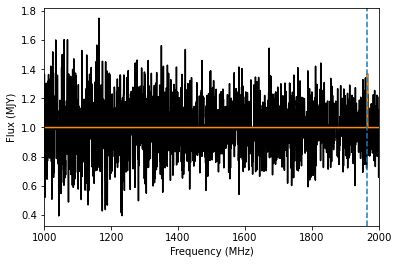

In [214]:
plt.plot(frequency, flatten_Ic, 'k')
plt.plot(frequency, compound_fit_bounded_I(frequency), color='darkorange')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (MJY)')
plt.axvline(x=freq_max_I, linestyle='--')
plt.xlim(1000, 2000)
plt.show()

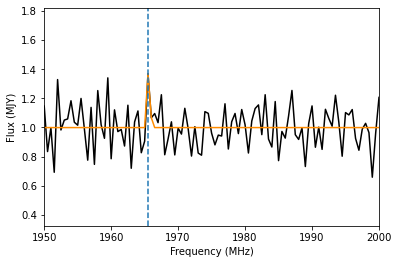

In [215]:
plt.plot(frequency, flatten_Ic, 'k')
plt.plot(frequency, compound_fit_bounded_I(frequency), color='darkorange')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (MJY)')
plt.axvline(x=freq_max_I, linestyle='--')
plt.xlim(1950, 2000)
plt.show()

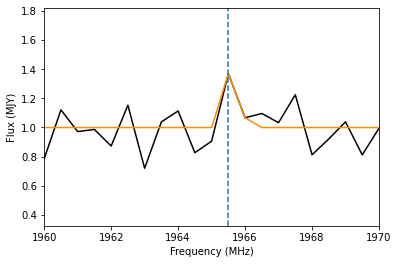

In [216]:
plt.plot(frequency, flatten_Ic, 'k')
plt.plot(frequency, compound_fit_bounded_I(frequency), color='darkorange')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (MJY)')
plt.axvline(x=freq_max_I, linestyle='--')
plt.xlim(1960, 1970)
plt.show()